In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import re

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Dataset Description

In [2]:
train_file = bz2.BZ2File('../input/amazonreviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('../input/amazonreviews/test.ft.txt.bz2')

In [3]:
def load_extract(file):
    texts, labels = [], [] 
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
    print('Done !')
    return np.array(labels), texts

In [4]:
train_labels, train_texts = load_extract(train_file)
test_labels, test_texts = load_extract(test_file)

Done !
Done !


In [5]:
train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

# Data Cleaning

In [6]:
def clean_texts(texts):
    stwords = stopwords.words('english')
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i]) #replace every digit with 0
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
        
        text = re.sub('[^a-zA-Z]', ' ', text) #anything which is not a character replace with whitespace char
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords 
        text = ' '.join(text)
        temp_texts.append(text)
    print('--100%--Done !')
    return temp_texts

In [7]:
print('Processing Training data')
train_texts = clean_texts(train_texts)
print('\nProcessing Test data')
test_texts = clean_texts(test_texts)

Processing Training data
--100%--Done !

Processing Test data
--100%--Done !


In [8]:
train_texts[0]

'stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

<Axes: ylabel='count'>

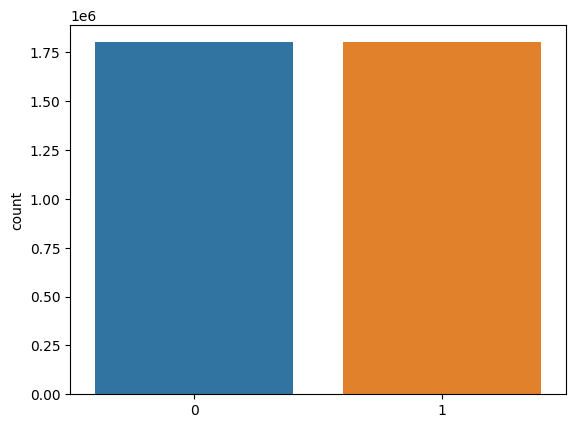

In [9]:
sns.countplot(x=train_labels)

# Text Vectorization

In [10]:
print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train_texts) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train_texts)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test_texts)

Fitting data...
fit complete !
tranforming training set...
tranforming test set...


# Model Building

In [11]:
lr_model = LogisticRegression(n_jobs=-1, max_iter=150)
lr_model.fit(train_texts_vec, train_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150, n_jobs=-1)

# Model Evaluation

In [12]:
pred_lr = lr_model.predict(test_texts_vec)

In [13]:
print('Accuracy:', accuracy_score(test_labels, pred_lr))

Accuracy: 0.900615


In [14]:
sample = test_texts[265]
print(sample)

sample_vec = count_vect.transform([sample])
pred = lr_model.predict(sample_vec)
print('\npredicted label:',pred[0])
print('actual label:', test_labels[100])

big deal thing interesting album mia accent seriously beats singing layered tired clich vocals album anyone else would top final verdict bad music

predicted label: 0
actual label: 0
